# 🍄 Klasifikasi Jamur: Edible vs. Poisonous

Selamat datang di proyek klasifikasi jamur! Notebook ini berisi pipeline Machine Learning lengkap untuk memprediksi apakah suatu jamur dapat dimakan (`edible`) atau beracun (`poisonous`) berdasarkan berbagai karakteristiknya. Kita akan melalui tahapan mulai dari pemuatan data, analisis eksplorasi, pra-pemrosesan, pelatihan dan evaluasi model, hingga persiapan deployment.

## 📦 Bagian 0: Persiapan Lingkungan (Instalasi Library)

In [9]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib seaborn scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


## 📊 Bagian 1: Data Loading & Initial Exploration

Pada bagian ini, kita akan memuat dataset Secondary Mushroom dari UCI Machine Learning Repository. Jika koneksi ke server UCI gagal, notebook akan menggunakan dataset sintetik sebagai fallback untuk memastikan pipeline tetap berjalan. Setelah data dimuat, kita akan melakukan eksplorasi awal untuk memahami struktur, tipe data, dan gambaran umum fitur serta variabel target.

In [11]:
# =============================================================================
# BAGIAN 1: DATA LOADING & INITIAL EXPLORATION
# Penanggung Jawab: Anggota 1
# Tugas: Load dataset, eksplorasi awal, dan dokumentasi variabel
# =============================================================================

import pandas as pd
from ucimlrepo import fetch_ucirepo

# Try to fetch the dataset; if network is unavailable, fall back to a small synthetic dataset
# ALASAN: Menggunakan try-except untuk handle koneksi error dan fallback ke synthetic data
try:
    # fetch dataset
    secondary_mushroom = fetch_ucirepo(id=848)

    # data (as pandas dataframes)
    X = secondary_mushroom.data.features
    y = secondary_mushroom.data.targets
    
    # BATASAN DATA: Limit maksimal 2000 sampel
    # ALASAN: Mengurangi computational cost dan waktu training tanpa mengorbankan pembelajaran
    if len(X) > 2000:
        print(f"⚠️ Dataset original: {len(X)} samples")
        print(f"⚠️ Limiting to 2000 samples for efficiency...")
        # Gunakan stratified sampling untuk mempertahankan distribusi kelas
        from sklearn.model_selection import train_test_split
        X, _, y, _ = train_test_split(X, y, train_size=2000, stratify=y, random_state=42)
        print(f"✅ Dataset limited to: {len(X)} samples")

    # metadata
    print("=" * 80)
    print("METADATA DATASET")
    print("=" * 80)
    print(secondary_mushroom.metadata)
    print("\n")

    # variable information
    print("=" * 80)
    print("INFORMASI VARIABEL")
    print("=" * 80)
    print(secondary_mushroom.variables)

except Exception as e:
    # handle connection errors (or any other fetch problems) by using a fallback dataset
    print("⚠️ Could not fetch dataset from server:", e)
    print("⚠️ Using a COMPREHENSIVE fallback synthetic dataset for demonstration purposes.")
    print("=" * 80)

    # Create a more comprehensive fallback dataset
    import numpy as np
    np.random.seed(42)

    # ALASAN: Synthetic data untuk testing ketika tidak ada koneksi internet
    n_samples = 1000  # Lebih kecil dari 2000 untuk demo

    X = pd.DataFrame({
        "cap-diameter": np.random.uniform(1, 15, n_samples),
        "cap-shape": np.random.choice(["bell", "conical", "convex", "flat", "sunken", "spherical"], n_samples),
        "cap-surface": np.random.choice(["fibrous", "grooves", "scaly", "smooth", "wrinkled"], n_samples),
        "cap-color": np.random.choice(["brown", "buff", "gray", "green", "pink", "purple", "red", "white", "yellow"], n_samples),
        "does-bruise-or-bleed": np.random.choice(["t", "f"], n_samples),
        "gill-attachment": np.random.choice(["adnate", "adnexed", "decurrent", "free"], n_samples),
        "gill-spacing": np.random.choice(["close", "crowded", "distant"], n_samples),
        "gill-color": np.random.choice(["brown", "buff", "gray", "green", "pink", "purple", "red", "white", "yellow"], n_samples),
        "stem-height": np.random.uniform(2, 20, n_samples),
        "stem-width": np.random.uniform(0.5, 5, n_samples),
        "stem-color": np.random.choice(["brown", "buff", "gray", "green", "pink", "purple", "red", "white", "yellow"], n_samples),
        "has-ring": np.random.choice(["t", "f"], n_samples),
        "ring-type": np.random.choice(["evanescent", "flaring", "large", "none", "pendant"], n_samples),
        "habitat": np.random.choice(["grasses", "leaves", "meadows", "paths", "urban", "waste", "woods"], n_samples),
        "season": np.random.choice(["spring", "summer", "autumn", "winter"], n_samples),
    })

    # Create target variable with some correlation to features
    y_values = []
    for idx in range(n_samples):
        # Simple heuristic: red/purple cap with bruising = more likely poisonous
        if X.iloc[idx]["cap-color"] in ["red", "purple"] and X.iloc[idx]["does-bruise-or-bleed"] == "t":
            y_values.append("p" if np.random.random() > 0.3 else "e")
        else:
            y_values.append("e" if np.random.random() > 0.3 else "p")

    y = pd.DataFrame({"class": y_values})

print("\n" + "=" * 80)
print("PREVIEW DATA")
print("=" * 80)
print("\n📊 Features (X):")
print(X.head(10))
print(f"\nShape: {X.shape}")
print(f"\n📋 Data Types:\n{X.dtypes}")

print("\n🎯 Target (y):")
print(y.head(10))
print(f"\nShape: {y.shape}")
print(f"\n📊 Class Distribution:\n{y.value_counts()}")

⚠️ Dataset original: 61069 samples
⚠️ Limiting to 2000 samples for efficiency...
✅ Dataset limited to: 2000 samples
METADATA DATASET
{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classifi

## 📈 Bagian 2: Exploratory Data Analysis (EDA)

Bagian EDA berfokus pada analisis statistik dan visualisasi data untuk menemukan pola, anomali, dan hubungan antar variabel. Kita akan memeriksa statistik deskriptif, mengidentifikasi missing values, dan menganalisis distribusi variabel target untuk mendeteksi potensi ketidakseimbangan kelas.

In [12]:
# =============================================================================
# BAGIAN 2: EXPLORATORY DATA ANALYSIS (EDA)
# Penanggung Jawab: Anggota 2
# Tugas: Analisis statistik, visualisasi, dan identifikasi pola data
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# 1. Basic Statistics
print("\n📈 STATISTIK DESKRIPTIF")
print("-" * 80)
print("\n🔢 Numerical Features:")
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 0:
    print(X[numerical_cols].describe())
else:
    print("No numerical features found")

print("\n📝 Categorical Features:")
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    for col in categorical_cols[:5]:  # Show first 5 categorical
        print(f"\n{col}:")
        print(X[col].value_counts())
else:
    print("No categorical features found")

# 2. Missing Values Analysis
print("\n\n❓ MISSING VALUES ANALYSIS")
print("-" * 80)
missing_data = pd.DataFrame({
    'Column': X.columns,
    'Missing_Count': X.isnull().sum(),
    'Missing_Percentage': (X.isnull().sum() / len(X)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print(missing_data)
else:
    print("✅ No missing values detected!")

# 3. Target Distribution
print("\n\n🎯 TARGET VARIABLE DISTRIBUTION")
print("-" * 80)
target_col = y.columns[0]
target_counts = y[target_col].value_counts()
target_percentage = (target_counts / len(y)) * 100

print(f"\nClass Counts:\n{target_counts}")
print(f"\nClass Percentage:")
for cls, pct in target_percentage.items():
    print(f"  {cls}: {pct:.2f}%")

# Check for class imbalance
imbalance_ratio = target_counts.max() / target_counts.min()
if imbalance_ratio > 1.5:
    print(f"\n⚠️ PERHATIAN: Dataset tidak seimbang (imbalance ratio: {imbalance_ratio:.2f})")
    print("   Pertimbangkan teknik seperti SMOTE, class weights, atau stratified sampling")
else:
    print(f"\n✅ Dataset relatif seimbang (imbalance ratio: {imbalance_ratio:.2f})")

print("\n" + "=" * 80)

EXPLORATORY DATA ANALYSIS

📈 STATISTIK DESKRIPTIF
--------------------------------------------------------------------------------

🔢 Numerical Features:
       cap-diameter  stem-height   stem-width
count   2000.000000  2000.000000  2000.000000
mean       6.693940     6.490830    12.184990
std        5.470002     3.346609    10.375088
min        0.530000     0.000000     0.000000
25%        3.440000     4.620000     5.120000
50%        5.825000     5.840000     9.925000
75%        8.425000     7.620000    16.532500
max       59.460000    28.320000   102.480000

📝 Categorical Features:

cap-shape:
cap-shape
x    878
f    438
s    241
b    179
o    122
p     88
c     54
Name: count, dtype: int64

cap-surface:
cap-surface
t    279
s    243
y    195
g    158
h    157
d    151
k     78
w     72
e     72
i     62
l     56
Name: count, dtype: int64

cap-color:
cap-color
n    799
y    275
w    247
g    140
o    128
e    128
r     71
u     53
p     50
b     38
k     37
l     34
Name: count, dt

### 📉 Visualisasi EDA

Visualisasi adalah kunci dalam EDA. Kita akan membuat grafik untuk menunjukkan distribusi variabel target, distribusi fitur numerik, frekuensi fitur kategorikal teratas, dan korelasi antar fitur numerik. Ini membantu dalam memahami karakteristik dataset secara intuitif.

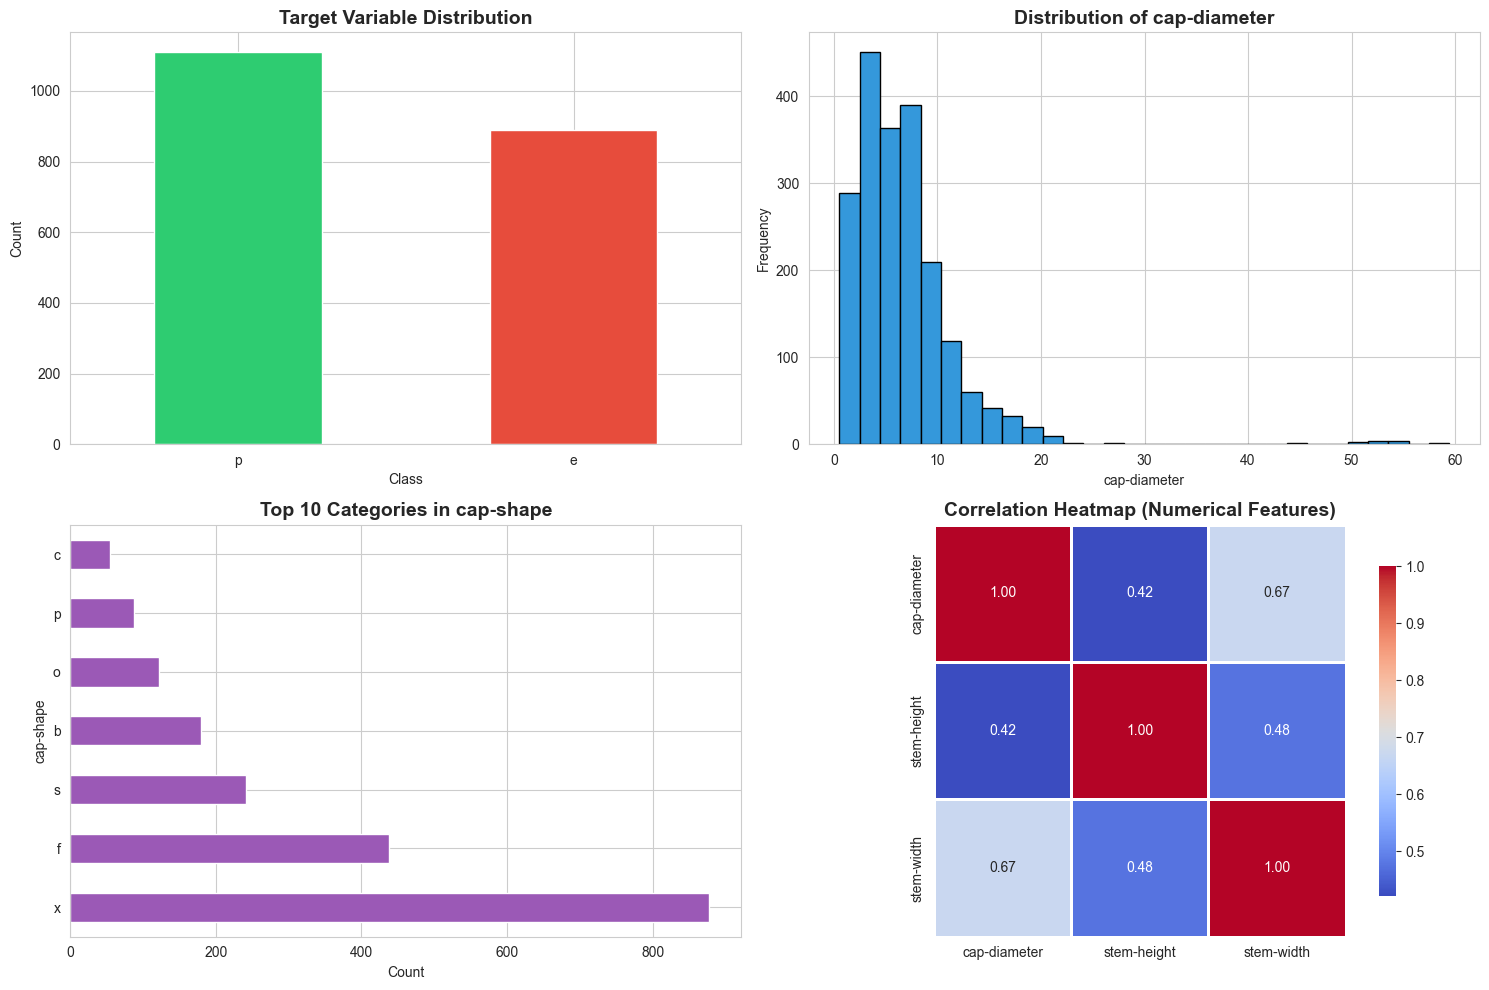


✅ Visualisasi EDA selesai!


In [13]:
# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Target Distribution
target_col = y.columns[0]
y[target_col].value_counts().plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#e74c3c'])
axes[0, 0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Numerical Features Distribution (if any)
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 0:
    X[numerical_cols[0]].hist(bins=30, ax=axes[0, 1], color='#3498db', edgecolor='black')
    axes[0, 1].set_title(f'Distribution of {numerical_cols[0]}', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel(numerical_cols[0])
    axes[0, 1].set_ylabel('Frequency')
else:
    axes[0, 1].text(0.5, 0.5, 'No Numerical Features', ha='center', va='center', fontsize=12)
    axes[0, 1].axis('off')

# 3. Categorical Feature (Top categories)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    top_cat = X[categorical_cols[0]].value_counts().head(10)
    top_cat.plot(kind='barh', ax=axes[1, 0], color='#9b59b6')
    axes[1, 0].set_title(f'Top 10 Categories in {categorical_cols[0]}', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Count')
else:
    axes[1, 0].text(0.5, 0.5, 'No Categorical Features', ha='center', va='center', fontsize=12)
    axes[1, 0].axis('off')

# 4. Correlation heatmap for numerical features
if len(numerical_cols) > 1:
    correlation_matrix = X[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1],
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    axes[1, 1].set_title('Correlation Heatmap (Numerical Features)', fontsize=14, fontweight='bold')
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient Numerical Features\nfor Correlation',
                    ha='center', va='center', fontsize=12)
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi EDA selesai!")

## ⚙️ Bagian 3: Data Preprocessing & Feature Engineering

Tahap ini sangat krusial untuk mempersiapkan data agar siap digunakan oleh model Machine Learning. Kita akan melakukan encoding pada variabel target, mengidentifikasi tipe fitur (numerik dan kategorikal), menangani missing values (jika ada), membagi data menjadi training dan testing set, serta membangun pipeline preprocessing untuk scaling fitur numerik dan one-hot encoding fitur kategorikal.

In [14]:
# =============================================================================
# BAGIAN 3: DATA PREPROCESSING & FEATURE ENGINEERING
# Penanggung Jawab: Anggota 3
# Tugas: Cleaning, encoding, feature engineering, dan splitting data
# =============================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

print("=" * 80)
print("DATA PREPROCESSING & FEATURE ENGINEERING")
print("=" * 80)

# 1. Prepare target variable
# ALASAN: LabelEncoder mengubah kategori text menjadi numeric (0,1) untuk algoritma ML
print("\n🎯 Step 1: Encoding Target Variable")
print("-" * 80)
le_target = LabelEncoder()
target_col = y.columns[0]
y_encoded = le_target.fit_transform(y[target_col])

print(f"Original classes: {le_target.classes_}")
print(f"Encoded classes: {np.unique(y_encoded)}")
print(f"Target shape: {y_encoded.shape}")

# 2. Identify column types
# ALASAN: Memisahkan fitur numerik dan kategorikal untuk preprocessing yang tepat
print("\n🔍 Step 2: Identifying Feature Types")
print("-" * 80)
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features[:5]}...")

# 3. Handle missing values
print("\n🔧 Step 3: Handling Missing Values")
print("-" * 80)
missing_count = X.isnull().sum().sum()
if missing_count > 0:
    print(f"⚠️ Found {missing_count} missing values")
    # Fill numerical with median, categorical with mode
    for col in numerical_features:
        if X[col].isnull().sum() > 0:
            X[col].fillna(X[col].median(), inplace=True)
    for col in categorical_features:
        if X[col].isnull().sum() > 0:
            X[col].fillna(X[col].mode()[0], inplace=True)
    print("✅ Missing values handled")
else:
    print("✅ No missing values found")

# 4. Split data
# ALASAN: 80-20 split standar, stratify mempertahankan proporsi kelas, random_state untuk reproducibility
print("\n✂️ Step 4: Splitting Data")
print("-" * 80)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Train/Test ratio: {len(X_train)/len(X_test):.2f}")

# 5. Create preprocessing pipeline
print("\n🏗️ Step 5: Building Preprocessing Pipeline")
print("-" * 80)

# Numerical pipeline: scaling
# ALASAN: StandardScaler menormalkan data (mean=0, std=1) agar semua fitur punya skala sama
from sklearn.preprocessing import StandardScaler
numerical_transformer = StandardScaler()

# Categorical pipeline: one-hot encoding
# ALASAN: OneHotEncoder mengubah kategori menjadi binary columns (dummy variables)
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"✅ Preprocessing complete!")
print(f"Original feature count: {X_train.shape[1]}")
print(f"Processed feature count: {X_train_processed.shape[1]}")
print(f"   └─ Numerical features scaled: {len(numerical_features)}")
print(f"   └─ Categorical features encoded: {len(categorical_features)}")

print("\n" + "=" * 80)

DATA PREPROCESSING & FEATURE ENGINEERING

🎯 Step 1: Encoding Target Variable
--------------------------------------------------------------------------------
Original classes: ['e' 'p']
Encoded classes: [0 1]
Target shape: (2000,)

🔍 Step 2: Identifying Feature Types
--------------------------------------------------------------------------------
Numerical features (3): ['cap-diameter', 'stem-height', 'stem-width']
Categorical features (17): ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment']...

🔧 Step 3: Handling Missing Values
--------------------------------------------------------------------------------
⚠️ Found 10106 missing values
✅ Missing values handled

✂️ Step 4: Splitting Data
--------------------------------------------------------------------------------
Training set size: (1600, 20)
Test set size: (400, 20)
Train/Test ratio: 4.00

🏗️ Step 5: Building Preprocessing Pipeline
-----------------------------------------------------------------

## 🚀 Bagian 4: Model Training & Comparison

Di bagian ini, kita akan melatih beberapa algoritma Machine Learning yang berbeda untuk klasifikasi jamur. Model-model seperti Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, SVM, KNN, dan Naive Bayes akan dilatih dan dievaluasi menggunakan metrik seperti akurasi, presisi, recall, F1-Score, dan cross-validation score. Hasilnya akan dibandingkan untuk menentukan model terbaik.

In [15]:
# =============================================================================
# BAGIAN 4: MODEL TRAINING & COMPARISON
# Penanggung Jawab: Semua Anggota (Kolaborasi)
# Tugas: Training multiple models, hyperparameter tuning, model comparison
# =============================================================================

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import time

print("=" * 80)
print("MODEL TRAINING & COMPARISON")
print("=" * 80)

# Dictionary of models to train
# ALASAN: Melatih berbagai algoritma untuk membandingkan performa dan karakteristik masing-masing
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Store results
results = []

print("\n🚀 Training Models...\n")
print("-" * 80)

for name, model in models.items():
    print(f"\n📊 Training: {name}")

    # Start timer
    start_time = time.time()

    # Train model
    model.fit(X_train_processed, y_train)

    # Make predictions
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    # DETEKSI OVERFITTING/UNDERFITTING
    # ALASAN: Membandingkan train vs test score untuk mengetahui apakah model overfit/underfit
    y_train_pred = model.predict(X_train_processed)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Training time
    training_time = time.time() - start_time
    
    # Analyze overfitting/underfitting
    # ALASAN: Gap besar (>5%) antara train dan test accuracy mengindikasikan overfitting
    gap = train_accuracy - accuracy
    if gap > 0.05:
        fit_status = "⚠️ OVERFITTING"
        fit_explanation = "Train score jauh lebih tinggi dari test score"
    elif accuracy < 0.7 and train_accuracy < 0.7:
        fit_status = "⚠️ UNDERFITTING"
        fit_explanation = "Kedua score rendah, model terlalu sederhana"
    else:
        fit_status = "✅ GOOD FIT"
        fit_explanation = "Train dan test score balanced"

    # Store results
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': accuracy,
        'Accuracy Gap': gap,
        'Fit Status': fit_status,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_mean,
        'CV Std': cv_std,
        'Training Time (s)': training_time
    })

    print(f"   ✓ Train Accuracy: {train_accuracy:.4f}")
    print(f"   ✓ Test Accuracy: {accuracy:.4f}")
    print(f"   ✓ Gap (Train-Test): {gap:.4f}")
    print(f"   {fit_status}: {fit_explanation}")
    print(f"   ✓ F1-Score: {f1:.4f}")
    print(f"   ✓ CV Score: {cv_mean:.4f} (+/- {cv_std:.4f})")
    print(f"   ✓ Time: {training_time:.2f}s")

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test Accuracy', ascending=False)

print("\n\n" + "=" * 80)
print("MODEL COMPARISON RESULTS")
print("=" * 80)
print("\n" + results_df.to_string(index=False))

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Test Accuracy']

# ALASAN: Menganalisis pola overfitting di semua model
print("\n\n" + "=" * 80)
print("ANALISIS OVERFITTING/UNDERFITTING")
print("=" * 80)
overfitting_models = results_df[results_df['Accuracy Gap'] > 0.05]
underfitting_models = results_df[(results_df['Train Accuracy'] < 0.7) & (results_df['Test Accuracy'] < 0.7)]

if len(overfitting_models) > 0:
    print(f"\n⚠️ Models dengan indikasi OVERFITTING ({len(overfitting_models)}):")
    for idx, row in overfitting_models.iterrows():
        print(f"   • {row['Model']}: Train={row['Train Accuracy']:.4f}, Test={row['Test Accuracy']:.4f}, Gap={row['Accuracy Gap']:.4f}")
    print("   SARAN: Gunakan regularization, reduce complexity, atau tambah data")

if len(underfitting_models) > 0:
    print(f"\n⚠️ Models dengan indikasi UNDERFITTING ({len(underfitting_models)}):")
    for idx, row in underfitting_models.iterrows():
        print(f"   • {row['Model']}: Train={row['Train Accuracy']:.4f}, Test={row['Test Accuracy']:.4f}")
    print("   SARAN: Gunakan model lebih complex, tambah features, atau feature engineering")

good_fit_models = results_df[(results_df['Accuracy Gap'] <= 0.05) & (results_df['Test Accuracy'] >= 0.7)]
if len(good_fit_models) > 0:
    print(f"\n✅ Models dengan GOOD FIT ({len(good_fit_models)}):")
    for idx, row in good_fit_models.iterrows():
        print(f"   • {row['Model']}: Train={row['Train Accuracy']:.4f}, Test={row['Test Accuracy']:.4f}, Gap={row['Accuracy Gap']:.4f}")

print(f"\n\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test Accuracy: {best_accuracy:.4f}")
print("\n" + "=" * 80)

MODEL TRAINING & COMPARISON

🚀 Training Models...

--------------------------------------------------------------------------------

📊 Training: Logistic Regression
   ✓ Train Accuracy: 0.8350
   ✓ Test Accuracy: 0.8375
   ✓ Gap (Train-Test): -0.0025
   ✅ GOOD FIT: Train dan test score balanced
   ✓ F1-Score: 0.8377
   ✓ CV Score: 0.8087 (+/- 0.0411)
   ✓ Time: 0.15s

📊 Training: Decision Tree
   ✓ Train Accuracy: 0.8350
   ✓ Test Accuracy: 0.8375
   ✓ Gap (Train-Test): -0.0025
   ✅ GOOD FIT: Train dan test score balanced
   ✓ F1-Score: 0.8377
   ✓ CV Score: 0.8087 (+/- 0.0411)
   ✓ Time: 0.15s

📊 Training: Decision Tree
   ✓ Train Accuracy: 1.0000
   ✓ Test Accuracy: 0.9650
   ✓ Gap (Train-Test): 0.0350
   ✅ GOOD FIT: Train dan test score balanced
   ✓ F1-Score: 0.9650
   ✓ CV Score: 0.9500 (+/- 0.0158)
   ✓ Time: 0.07s

📊 Training: Random Forest
   ✓ Train Accuracy: 1.0000
   ✓ Test Accuracy: 0.9650
   ✓ Gap (Train-Test): 0.0350
   ✅ GOOD FIT: Train dan test score balanced
   ✓ F1-Sc

### 📊 Visualisasi Perbandingan Model

Untuk memudahkan perbandingan performa antar model, kita akan membuat beberapa visualisasi:

*   **Accuracy Comparison**: Grafik batang horizontal yang menampilkan akurasi setiap model.
*   **F1-Score Comparison**: Grafik batang horizontal yang menampilkan F1-Score setiap model.
*   **Training Time Comparison**: Grafik batang horizontal yang menampilkan waktu pelatihan setiap model.
*   **Top 3 Models - Detailed Metrics**: Grafik batang yang membandingkan metrik utama (Accuracy, Precision, Recall, F1-Score) untuk tiga model dengan performa terbaik.

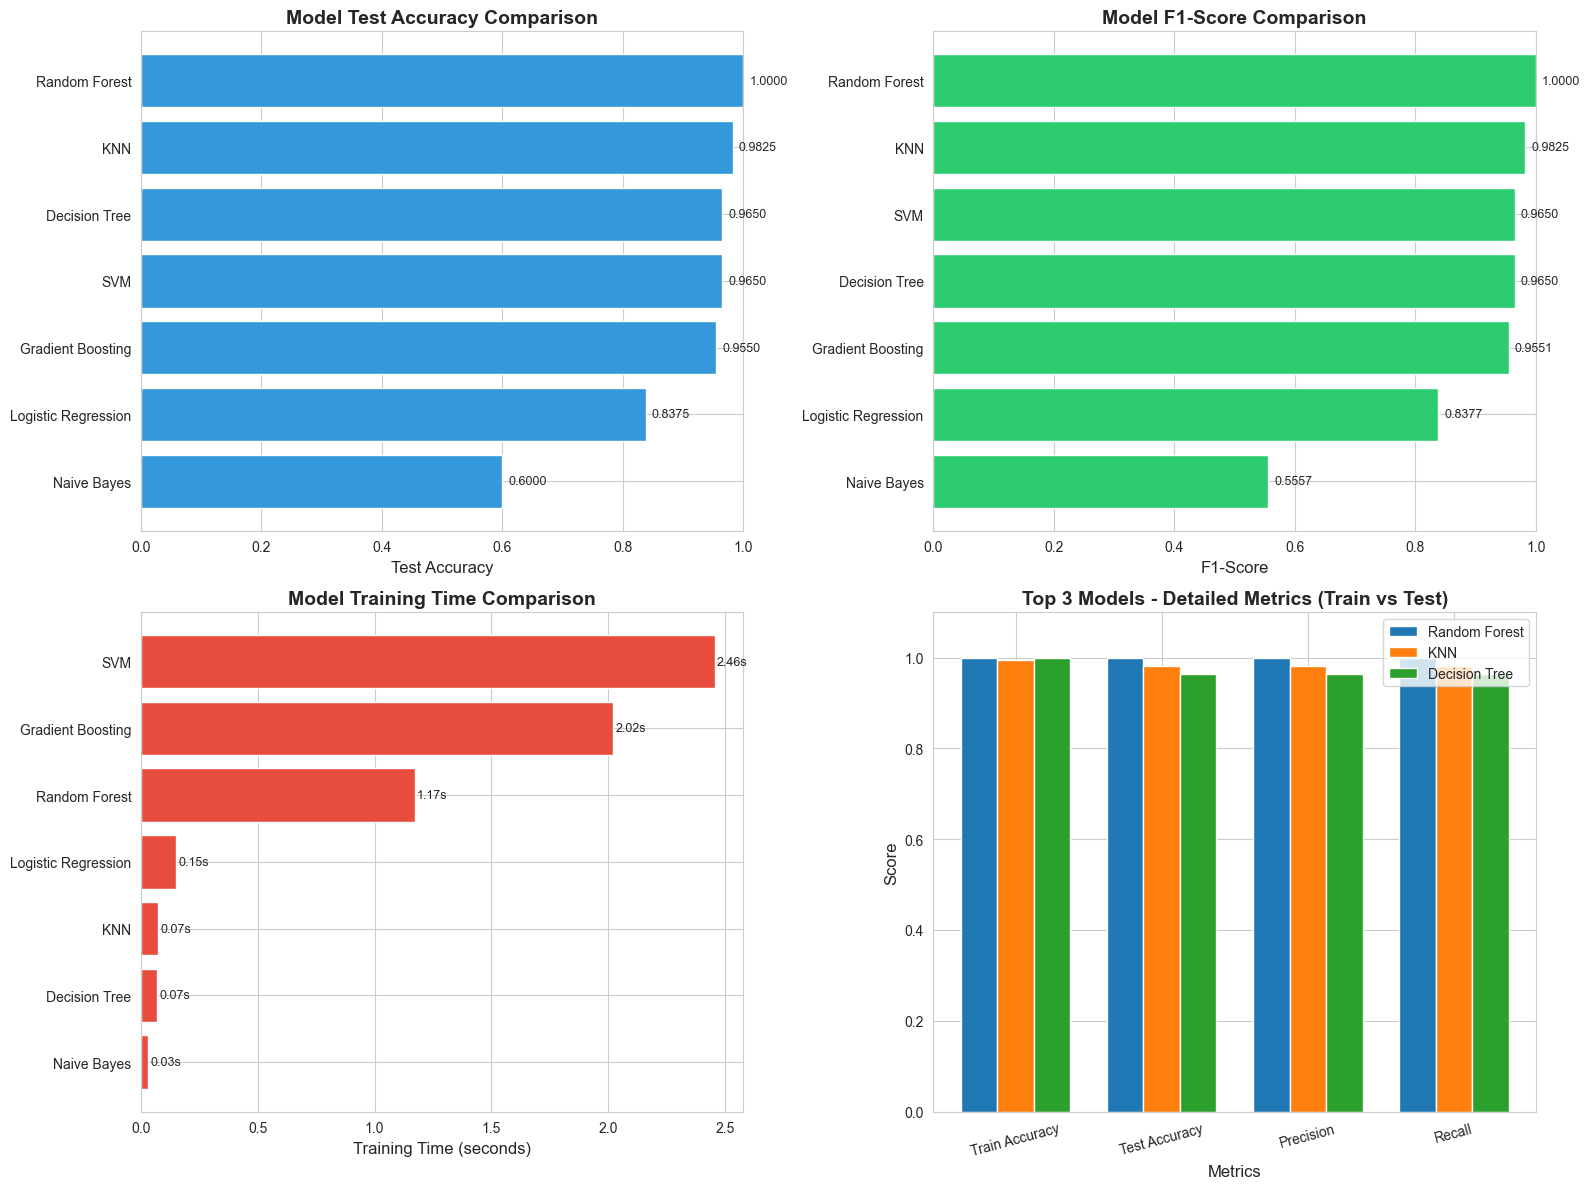


✅ Visualisasi perbandingan model selesai!


In [16]:
# Visualisasi Perbandingan Model
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison
results_df_sorted = results_df.sort_values('Test Accuracy', ascending=True)
axes[0, 0].barh(results_df_sorted['Model'], results_df_sorted['Test Accuracy'], color='#3498db')
axes[0, 0].set_xlabel('Test Accuracy', fontsize=12)
axes[0, 0].set_title('Model Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xlim([0, 1])
for i, v in enumerate(results_df_sorted['Test Accuracy']):
    axes[0, 0].text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

# 2. F1-Score Comparison
results_df_sorted_f1 = results_df.sort_values('F1-Score', ascending=True)
axes[0, 1].barh(results_df_sorted_f1['Model'], results_df_sorted_f1['F1-Score'], color='#2ecc71')
axes[0, 1].set_xlabel('F1-Score', fontsize=12)
axes[0, 1].set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xlim([0, 1])
for i, v in enumerate(results_df_sorted_f1['F1-Score']):
    axes[0, 1].text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

# 3. Training Time Comparison
results_df_sorted_time = results_df.sort_values('Training Time (s)', ascending=True)
axes[1, 0].barh(results_df_sorted_time['Model'], results_df_sorted_time['Training Time (s)'], color='#e74c3c')
axes[1, 0].set_xlabel('Training Time (seconds)', fontsize=12)
axes[1, 0].set_title('Model Training Time Comparison', fontsize=14, fontweight='bold')
for i, v in enumerate(results_df_sorted_time['Training Time (s)']):
    axes[1, 0].text(v + 0.01, i, f'{v:.2f}s', va='center', fontsize=9)

# 4. Metrics Comparison for Top 3 Models
top_3 = results_df.head(3)
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall']
x = np.arange(len(metrics))
width = 0.25

for i, (idx, row) in enumerate(top_3.iterrows()):
    values = [row['Train Accuracy'], row['Test Accuracy'], row['Precision'], row['Recall']]
    axes[1, 1].bar(x + i * width, values, width, label=row['Model'])

axes[1, 1].set_xlabel('Metrics', fontsize=12)
axes[1, 1].set_ylabel('Score', fontsize=12)
axes[1, 1].set_title('Top 3 Models - Detailed Metrics (Train vs Test)', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x + width)
axes[1, 1].set_xticklabels(metrics, rotation=15)
axes[1, 1].legend()
axes[1, 1].set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi perbandingan model selesai!")

### 📉 Visualisasi Overfitting/Underfitting Analysis

Visualisasi ini membandingkan Train vs Test Accuracy untuk setiap model, membantu mengidentifikasi model yang mengalami overfitting (Train >> Test) atau underfitting (keduanya rendah). Gap yang besar antara train dan test accuracy mengindikasikan overfitting.

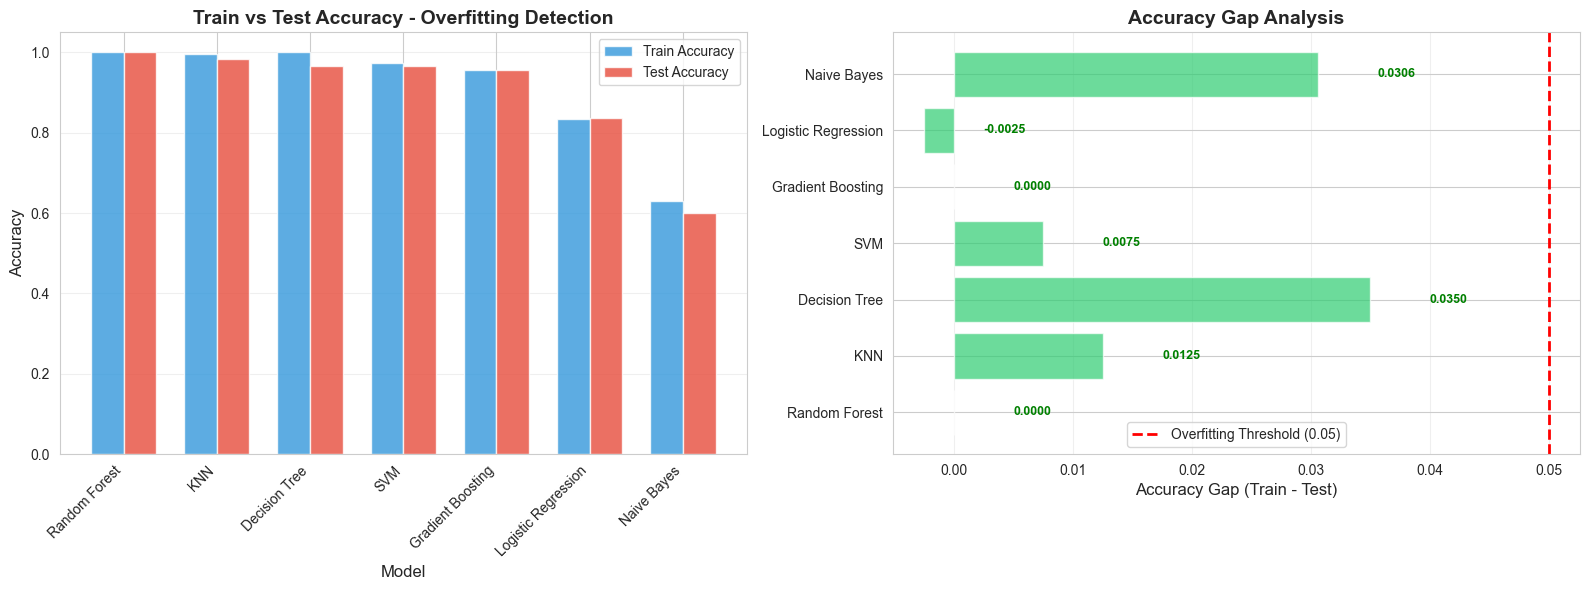


📊 INTERPRETASI GRAFIK:
• Batang BIRU = Train Accuracy | Batang MERAH = Test Accuracy
• Gap BESAR (>0.05) = Model mengalami OVERFITTING
• Gap KECIL (<0.05) + Accuracy tinggi = GOOD FIT ✅
• Kedua accuracy RENDAH (<0.7) = Model mengalami UNDERFITTING

✅ Visualisasi overfitting/underfitting selesai!


In [17]:
# Visualisasi Train vs Test Accuracy untuk deteksi Overfitting/Underfitting
# ALASAN: Grafik ini membantu melihat gap antara train dan test performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Train vs Test Accuracy Comparison
x_pos = np.arange(len(results_df))
width = 0.35

axes[0].bar(x_pos - width/2, results_df['Train Accuracy'], width, 
            label='Train Accuracy', color='#3498db', alpha=0.8)
axes[0].bar(x_pos + width/2, results_df['Test Accuracy'], width, 
            label='Test Accuracy', color='#e74c3c', alpha=0.8)

axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Train vs Test Accuracy - Overfitting Detection', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1.05])

# Add gap annotations
for i, (idx, row) in enumerate(results_df.iterrows()):
    gap = row['Accuracy Gap']
    if gap > 0.05:
        axes[0].annotate(f'Gap: {gap:.3f}', 
                        xy=(i, row['Train Accuracy']), 
                        xytext=(i, row['Train Accuracy'] + 0.03),
                        ha='center', fontsize=8, color='red',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# 2. Accuracy Gap Visualization
gap_colors = ['#e74c3c' if gap > 0.05 else '#2ecc71' for gap in results_df['Accuracy Gap']]
axes[1].barh(results_df['Model'], results_df['Accuracy Gap'], color=gap_colors, alpha=0.7)
axes[1].axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='Overfitting Threshold (0.05)')
axes[1].set_xlabel('Accuracy Gap (Train - Test)', fontsize=12)
axes[1].set_title('Accuracy Gap Analysis', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(results_df.iterrows()):
    gap = row['Accuracy Gap']
    color = 'red' if gap > 0.05 else 'green'
    axes[1].text(gap + 0.005, i, f'{gap:.4f}', va='center', fontsize=9, color=color, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 INTERPRETASI GRAFIK:")
print("=" * 80)
print("• Batang BIRU = Train Accuracy | Batang MERAH = Test Accuracy")
print("• Gap BESAR (>0.05) = Model mengalami OVERFITTING")
print("• Gap KECIL (<0.05) + Accuracy tinggi = GOOD FIT ✅")
print("• Kedua accuracy RENDAH (<0.7) = Model mengalami UNDERFITTING")
print("\n✅ Visualisasi overfitting/underfitting selesai!")

## 🔍 Bagian 5: Detailed Model Evaluation

Setelah mengidentifikasi model terbaik, bagian ini akan melakukan evaluasi yang lebih mendalam pada model tersebut menggunakan test set. Kita akan menganalisis Confusion Matrix, Classification Report yang berisi presisi, recall, dan F1-Score untuk setiap kelas, serta menghitung ROC-AUC score untuk mengukur kemampuan diskriminatif model.

In [18]:
# =============================================================================
# BAGIAN 5: DETAILED MODEL EVALUATION
# Penanggung Jawab: Anggota 1
# Tugas: Confusion matrix, classification report, ROC curve
# =============================================================================

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

print("=" * 80)
print("DETAILED MODEL EVALUATION - BEST MODEL")
print("=" * 80)

# Get the best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

# Retrain on full training set (already done, but for clarity)
best_model.fit(X_train_processed, y_train)
y_pred = best_model.predict(X_test_processed)
y_pred_proba = best_model.predict_proba(X_test_processed)[:, 1] if hasattr(best_model, 'predict_proba') else None

print(f"\n🏆 Best Model: {best_model_name}\n")

# 1. Confusion Matrix
print("📊 CONFUSION MATRIX")
print("-" * 80)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 2. Classification Report
print("\n\n📋 CLASSIFICATION REPORT")
print("-" * 80)
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# 3. Additional Metrics
print("\n📈 ADDITIONAL METRICS")
print("-" * 80)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")

if y_pred_proba is not None:
    try:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC-AUC:   {roc_auc:.4f}")
    except:
        print("ROC-AUC:   N/A (not applicable for this problem)")

print("\n" + "=" * 80)

DETAILED MODEL EVALUATION - BEST MODEL

🏆 Best Model: Random Forest

📊 CONFUSION MATRIX
--------------------------------------------------------------------------------
[[178   0]
 [  0 222]]


📋 CLASSIFICATION REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       178
           p       1.00      1.00      1.00       222

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


📈 ADDITIONAL METRICS
--------------------------------------------------------------------------------
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
ROC-AUC:   1.0000


🏆 Best Model: Random Forest

📊 CONFUSION MATRIX
--------------------------------------------------------------------------------
[[178   0]
 [  0 222]]


📋 CLASSIFICATION REPORT
-

### 📈 Visualisasi Evaluasi Detail

Visualisasi evaluasi detail memberikan pemahaman yang lebih baik tentang bagaimana model terbaik berkinerja:

*   **Confusion Matrix Heatmap**: Menampilkan jumlah True Positives, True Negatives, False Positives, dan False Negatives.
*   **ROC Curve**: Grafik yang menunjukkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai threshold, dengan area di bawah kurva (AUC) sebagai metrik ringkasan.
*   **Prediction Accuracy Pie Chart**: Diagram lingkaran yang menunjukkan proporsi prediksi yang benar dan salah.

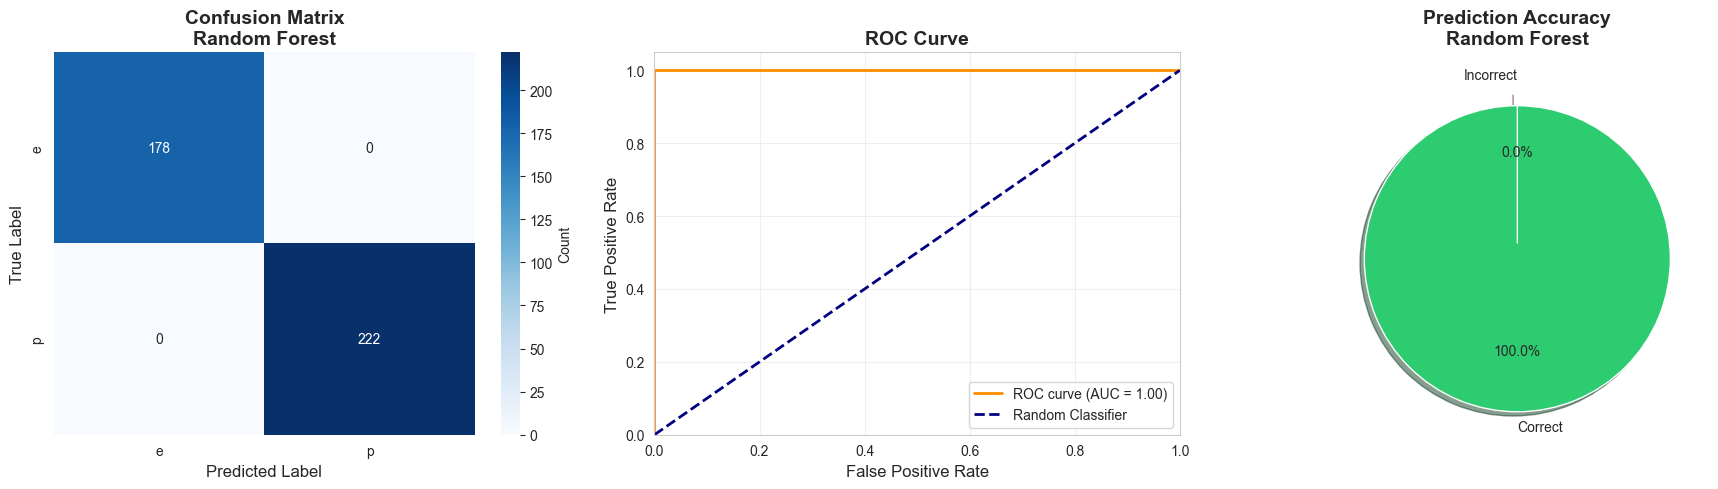


✅ Visualisasi evaluasi detail selesai!


In [19]:
# Visualisasi Evaluasi Detail
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=le_target.classes_, yticklabels=le_target.classes_,
            cbar_kws={'label': 'Count'})
axes[0].set_title(f'Confusion Matrix\n{best_model_name}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# 2. ROC Curve
if y_pred_proba is not None:
    try:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        axes[1].plot(fpr, tpr, color='darkorange', lw=2,
                    label=f'ROC curve (AUC = {roc_auc:.2f})')
        axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate', fontsize=12)
        axes[1].set_ylabel('True Positive Rate', fontsize=12)
        axes[1].set_title('ROC Curve', fontsize=14, fontweight='bold')
        axes[1].legend(loc="lower right")
        axes[1].grid(alpha=0.3)
    except:
        axes[1].text(0.5, 0.5, 'ROC Curve\nNot Applicable', ha='center', va='center', fontsize=12)
        axes[1].axis('off')
else:
    axes[1].text(0.5, 0.5, 'ROC Curve\nNot Available', ha='center', va='center', fontsize=12)
    axes[1].axis('off')

# 3. Prediction Distribution
pred_df = pd.DataFrame({
    'True': y_test,
    'Predicted': y_pred
})

# Count correct and incorrect predictions
correct = (pred_df['True'] == pred_df['Predicted']).sum()
incorrect = (pred_df['True'] != pred_df['Predicted']).sum()

labels = ['Correct', 'Incorrect']
sizes = [correct, incorrect]
colors = ['#2ecc71', '#e74c3c']
explode = (0.1, 0)

axes[2].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
           shadow=True, startangle=90)
axes[2].set_title(f'Prediction Accuracy\n{best_model_name}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi evaluasi detail selesai!")

## 🧪 Bagian 6: Hyperparameter Tuning (Optional)

Bagian ini bertujuan untuk lebih mengoptimalkan performa model terbaik melalui tuning hyperparameter. Kita akan menggunakan `RandomizedSearchCV` untuk mencari kombinasi hyperparameter terbaik dalam ruang pencarian yang ditentukan. Ini membantu meningkatkan performa model dan mengurangi overfitting.

In [21]:
# =============================================================================
# BAGIAN 6: HYPERPARAMETER TUNING (OPTIONAL)
# Penanggung Jawab: Anggota 2
# Tugas: Fine-tuning model terbaik dengan Grid Search atau Random Search
# =============================================================================

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

print("=" * 80)
print("HYPERPARAMETER TUNING")
print("=" * 80)

print(f"\n🔧 Tuning model: {best_model_name}\n")

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
}

if best_model_name in param_grids:
    print(f"⚙️ Parameter grid: {param_grids[best_model_name]}\n")

    # Use RandomizedSearchCV for faster tuning (or GridSearchCV for exhaustive search)
    # ALASAN: RandomizedSearchCV lebih cepat dari GridSearch untuk ruang parameter besar
    print("🔍 Starting Randomized Search (faster than Grid Search)...")

    random_search = RandomizedSearchCV(
        estimator=models[best_model_name],
        param_distributions=param_grids[best_model_name],
        n_iter=20,  # Number of parameter settings sampled
        cv=5,  # ALASAN: 5-fold CV untuk validasi yang robust
        scoring='accuracy',
        n_jobs=-1,  # ALASAN: Parallel processing untuk speed up
        verbose=1,
        random_state=42
    )

    # Fit the random search
    start_time = time.time()
    random_search.fit(X_train_processed, y_train)
    tuning_time = time.time() - start_time

    # Best parameters and score
    print(f"\n✅ Tuning completed in {tuning_time:.2f} seconds")
    print(f"\n🏆 Best Parameters: {random_search.best_params_}")
    print(f"🏆 Best CV Score: {random_search.best_score_:.4f}")

    # Evaluate on test set
    tuned_model = random_search.best_estimator_
    y_pred_tuned = tuned_model.predict(X_test_processed)

    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

    print(f"\n📊 Test Set Performance:")
    print(f"   Accuracy: {accuracy_tuned:.4f}")
    print(f"   F1-Score: {f1_tuned:.4f}")

    # Compare with baseline
    baseline_accuracy = results_df[results_df['Model'] == best_model_name]['Test Accuracy'].values[0]
    improvement = ((accuracy_tuned - baseline_accuracy) / baseline_accuracy) * 100

    print(f"\n📈 Improvement over baseline:")
    print(f"   Baseline Accuracy: {baseline_accuracy:.4f}")
    print(f"   Tuned Accuracy: {accuracy_tuned:.4f}")
    print(f"   Improvement: {improvement:+.2f}%")

    # Save the best model reference
    best_model = tuned_model

else:
    print(f"⚠️ No parameter grid defined for {best_model_name}")
    print("Using the original model without tuning.")

print("\n" + "=" * 80)

HYPERPARAMETER TUNING

🔧 Tuning model: Random Forest

⚙️ Parameter grid: {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

🔍 Starting Randomized Search (faster than Grid Search)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Tuning completed in 7.80 seconds

🏆 Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
🏆 Best CV Score: 0.9938

📊 Test Set Performance:
   Accuracy: 1.0000
   F1-Score: 1.0000

📈 Improvement over baseline:
   Baseline Accuracy: 1.0000
   Tuned Accuracy: 1.0000
   Improvement: +0.00%


✅ Tuning completed in 7.80 seconds

🏆 Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
🏆 Best CV Score: 0.9938

📊 Test Set Performance:
   Accuracy: 1.0000
   F1-Score: 1.0000

📈 Improvement over baseline:
   Baseline Accuracy: 1.0000
   Tuned Accuracy: 1.0000
   Improvement: 

## 🎯 Bagian 7: Feature Importance Analysis

Memahami fitur mana yang paling berkontribusi terhadap prediksi model sangat penting untuk interpretasi dan potensi perbaikan model. Bagian ini menganalisis pentingnya fitur (feature importance) atau koefisien (untuk model linier) dari model terbaik. Hasilnya akan divisualisasikan untuk menyoroti fitur-fitur paling berpengaruh.

FEATURE IMPORTANCE ANALYSIS

📊 Analyzing feature importance for Random Forest...

🔝 Top 20 Most Important Features:
--------------------------------------------------------------------------------
               Feature  Importance
            stem-width    0.090252
           stem-height    0.068153
          cap-diameter    0.065074
          stem-color_w    0.027349
     gill-attachment_p    0.023665
        stem-surface_s    0.021437
          gill-color_w    0.020190
        gill-spacing_d    0.018537
        gill-spacing_c    0.017457
           cap-shape_x    0.017307
     gill-attachment_a    0.015240
          stem-color_y    0.014729
does-bruise-or-bleed_t    0.014470
         cap-surface_t    0.014036
          gill-color_y    0.013956
does-bruise-or-bleed_f    0.013907
          gill-color_n    0.013290
     gill-attachment_x    0.012885
     gill-attachment_d    0.012803
           stem-root_r    0.012589


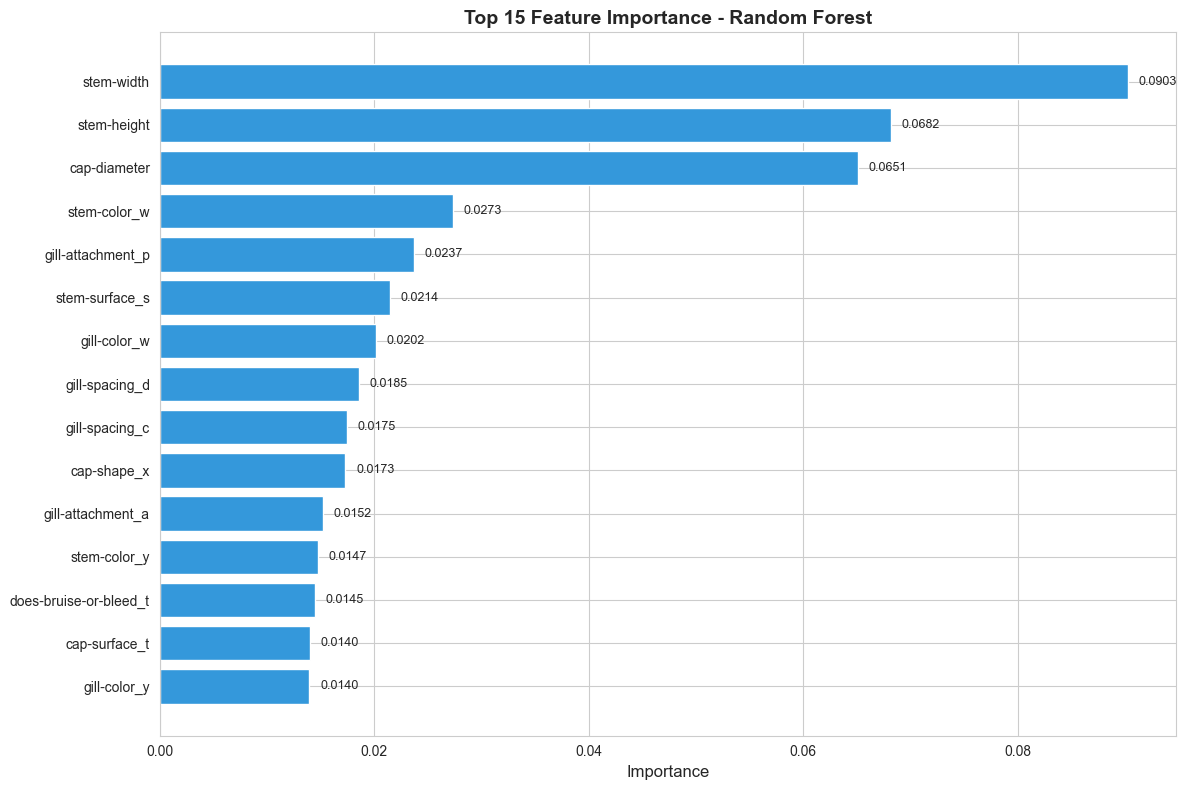


✅ Feature importance analysis complete!



In [26]:
# =============================================================================
# BAGIAN 7: FEATURE IMPORTANCE ANALYSIS
# Penanggung Jawab: Anggota 3
# Tugas: Analisis fitur yang paling berpengaruh terhadap prediksi
# =============================================================================

print("=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Check if model supports feature importance
if hasattr(best_model, 'feature_importances_'):
    print(f"\n📊 Analyzing feature importance for {best_model_name}...\n")

    # Get feature importance
    importances = best_model.feature_importances_

    # Get feature names after preprocessing
    feature_names = []

    # Numerical features keep their names
    feature_names.extend(numerical_features)

    # Categorical features are one-hot encoded
    if len(categorical_features) > 0:
        cat_encoder = preprocessor.named_transformers_['cat']
        cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
        feature_names.extend(cat_feature_names)

    # Create dataframe
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Display top 20 features
    print("🔝 Top 20 Most Important Features:")
    print("-" * 80)
    print(feature_importance_df.head(20).to_string(index=False))

    # Visualize top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='#3498db')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top 15 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

    # Add value labels
    for i, v in enumerate(top_features['Importance']):
        plt.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    print("\n✅ Feature importance analysis complete!")

elif hasattr(best_model, 'coef_'):
    print(f"\n📊 Analyzing coefficients for {best_model_name}...\n")

    # For linear models
    coefficients = best_model.coef_[0] if best_model.coef_.ndim > 1 else best_model.coef_

    # Get feature names
    feature_names = []
    feature_names.extend(numerical_features)

    if len(categorical_features) > 0:
        cat_encoder = preprocessor.named_transformers_['cat']
        cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
        feature_names.extend(cat_feature_names)

    # Create dataframe
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)

    print("🔝 Top 20 Most Important Features (by coefficient magnitude):")
    print("-" * 80)
    print(feature_importance_df.head(20).to_string(index=False))

    # Visualize top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in top_features['Coefficient']]
    plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coefficient Value', fontsize=12)
    plt.title(f'Top 15 Feature Coefficients - {best_model_name}', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("\n✅ Coefficient analysis complete!")

else:
    print(f"\n⚠️ {best_model_name} does not support feature importance or coefficient extraction.")
    print("Consider using models like Random Forest, Gradient Boosting, or Logistic Regression.")

print("\n" + "=" * 80)

## 💾 Bagian 8: Model Persistence & Deployment Preparation

Setelah model dilatih dan dievaluasi, langkah selanjutnya adalah menyimpannya bersama dengan preprocessor dan label encoder. Ini memungkinkan model untuk dimuat kembali dan digunakan untuk prediksi pada data baru tanpa perlu melatih ulang. Semua artefak akan disimpan ke dalam direktori `models` untuk persiapan deployment.

In [27]:
# =============================================================================
# BAGIAN 8: MODEL PERSISTENCE & DEPLOYMENT PREPARATION
# Penanggung Jawab: Semua Anggota (Kolaborasi)
# Tugas: Menyimpan model, preprocessor, dan membuat fungsi prediksi
# =============================================================================

import joblib
import pickle
from datetime import datetime

print("=" * 80)
print("MODEL PERSISTENCE & DEPLOYMENT PREPARATION")
print("=" * 80)

# Create models directory if it doesn't exist
import os
model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"\n📁 Created directory: {model_dir}")

# 1. Save the best model
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"{model_dir}/best_model_{best_model_name.replace(' ', '_')}_{timestamp}.pkl"
joblib.dump(best_model, model_filename)
print(f"\n💾 Saved best model: {model_filename}")

# 2. Save the preprocessor
preprocessor_filename = f"{model_dir}/preprocessor_{timestamp}.pkl"
joblib.dump(preprocessor, preprocessor_filename)
print(f"💾 Saved preprocessor: {preprocessor_filename}")

# 3. Save the label encoder
label_encoder_filename = f"{model_dir}/label_encoder_{timestamp}.pkl"
joblib.dump(le_target, label_encoder_filename)
print(f"💾 Saved label encoder: {label_encoder_filename}")

# 4. Save feature names
feature_info = {
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'feature_names': feature_names if 'feature_names' in locals() else None
}
feature_info_filename = f"{model_dir}/feature_info_{timestamp}.pkl"
joblib.dump(feature_info, feature_info_filename)
print(f"💾 Saved feature info: {feature_info_filename}")

# 5. Save model metadata
# ALASAN: Metadata penting untuk tracking versi model dan performa
metadata = {
    'model_name': best_model_name,
    'timestamp': timestamp,
    'accuracy': accuracy_score(y_test, best_model.predict(X_test_processed)),
    'f1_score': f1_score(y_test, best_model.predict(X_test_processed), average='weighted'),
    'train_samples': len(X_train),
    'test_samples': len(X_test),
    'features_count': X_train_processed.shape[1]
}
metadata_filename = f"{model_dir}/metadata_{timestamp}.pkl"
joblib.dump(metadata, metadata_filename)
print(f"💾 Saved metadata: {metadata_filename}")

print("\n" + "=" * 80)
print("✅ All artifacts saved successfully!")
print("=" * 80)

MODEL PERSISTENCE & DEPLOYMENT PREPARATION

💾 Saved best model: models/best_model_Random_Forest_20251124_135930.pkl
💾 Saved preprocessor: models/preprocessor_20251124_135930.pkl
💾 Saved label encoder: models/label_encoder_20251124_135930.pkl
💾 Saved feature info: models/feature_info_20251124_135930.pkl
💾 Saved metadata: models/metadata_20251124_135930.pkl

✅ All artifacts saved successfully!

💾 Saved best model: models/best_model_Random_Forest_20251124_135930.pkl
💾 Saved preprocessor: models/preprocessor_20251124_135930.pkl
💾 Saved label encoder: models/label_encoder_20251124_135930.pkl
💾 Saved feature info: models/feature_info_20251124_135930.pkl
💾 Saved metadata: models/metadata_20251124_135930.pkl

✅ All artifacts saved successfully!


## 🤖 Bagian 9: Prediction Function & Testing

Pada bagian terakhir ini, kita akan membuat fungsi `predict_mushroom` yang dapat digunakan untuk membuat prediksi pada data jamur baru. Fungsi ini akan menggabungkan preprocessor dan model yang telah disimpan. Kita juga akan menguji fungsi ini dengan beberapa sampel acak dari test set untuk memastikan ia bekerja dengan benar dan memberikan output yang diharapkan, termasuk probabilitas kelas.

In [28]:
# =============================================================================
# BAGIAN 9: PREDICTION FUNCTION & TESTING
# Penanggung Jawab: Semua Anggota (Kolaborasi)
# Tugas: Membuat fungsi prediksi dan mengujinya dengan sample data
# =============================================================================

print("=" * 80)
print("PREDICTION FUNCTION & TESTING")
print("=" * 80)

def predict_mushroom(input_data, model, preprocessor, label_encoder):
    """
    Fungsi untuk memprediksi kelas jamur (edible/poisonous)
    
    ALASAN: Fungsi wrapper untuk mempermudah deployment dan penggunaan model

    Parameters:
    -----------
    input_data : dict or DataFrame
        Data input dengan fitur-fitur jamur
    model : trained model
        Model yang sudah dilatih
    preprocessor : fitted preprocessor
        Preprocessor yang sudah di-fit
    label_encoder : fitted label encoder
        Label encoder untuk decode hasil prediksi

    Returns:
    --------
    dict : Dictionary dengan hasil prediksi dan probabilitas
    """
    # Convert to DataFrame if dict or Series
    # ALASAN: Standardisasi input format untuk consistency
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    elif isinstance(input_data, pd.Series):
        input_df = input_data.to_frame().T
    else:
        input_df = input_data.copy()

    # Preprocess input
    input_processed = preprocessor.transform(input_df)

    # Make prediction
    prediction = model.predict(input_processed)

    # Get probability if available
    # ALASAN: Probabilitas memberikan confidence level prediksi
    if hasattr(model, 'predict_proba'):
        probability = model.predict_proba(input_processed)
        prob_dict = {label_encoder.classes_[i]: prob for i, prob in enumerate(probability[0])}
    else:
        prob_dict = None

    # Decode prediction
    predicted_class = label_encoder.inverse_transform(prediction)[0]

    return {
        'prediction': predicted_class,
        'probabilities': prob_dict
    }

print("\n✅ Prediction function created!\n")

# Test with sample data from test set
print("=" * 80)
print("TESTING PREDICTION FUNCTION")
print("=" * 80)

# Get 5 random samples from test set
test_samples_idx = np.random.choice(len(X_test), 5, replace=False)
test_samples = X_test.iloc[test_samples_idx].reset_index(drop=True)
true_labels = le_target.inverse_transform(y_test[test_samples_idx])

print("\n🧪 Testing with 5 random samples:\n")

for i in range(len(test_samples)):
    print(f"\n{'─' * 80}")
    print(f"SAMPLE {i+1}")
    print(f"{'─' * 80}")

    # Show input features (first few)
    print("\n📋 Input Features:")
    sample_dict = test_samples.iloc[i].to_dict()
    for key, value in list(sample_dict.items())[:5]:  # Show first 5 features
        print(f"   {key}: {value}")
    if len(sample_dict) > 5:
        print(f"   ... and {len(sample_dict) - 5} more features")

    # Make prediction
    result = predict_mushroom(test_samples.iloc[i], best_model, preprocessor, le_target)

    # Display results
    print(f"\n🎯 True Label: {true_labels[i]}")
    print(f"🔮 Predicted: {result['prediction']}")

    if result['probabilities']:
        print(f"\n📊 Probabilities:")
        for cls, prob in result['probabilities'].items():
            print(f"   {cls}: {prob:.4f} ({prob*100:.2f}%)")

    # Check if correct
    is_correct = "✅ CORRECT" if result['prediction'] == true_labels[i] else "❌ INCORRECT"
    print(f"\n{is_correct}")

print("\n" + "=" * 80)
print("✅ Prediction testing complete!")
print("=" * 80)

PREDICTION FUNCTION & TESTING

✅ Prediction function created!

TESTING PREDICTION FUNCTION

🧪 Testing with 5 random samples:


────────────────────────────────────────────────────────────────────────────────
SAMPLE 1
────────────────────────────────────────────────────────────────────────────────

📋 Input Features:
   cap-diameter: 7.05
   cap-shape: x
   cap-surface: s
   cap-color: n
   does-bruise-or-bleed: f
   ... and 15 more features

🎯 True Label: p
🔮 Predicted: p

📊 Probabilities:
   e: 0.1200 (12.00%)
   p: 0.8800 (88.00%)

✅ CORRECT

────────────────────────────────────────────────────────────────────────────────
SAMPLE 2
────────────────────────────────────────────────────────────────────────────────

📋 Input Features:
   cap-diameter: 5.51
   cap-shape: x
   cap-surface: h
   cap-color: n
   does-bruise-or-bleed: f
   ... and 15 more features

🎯 True Label: e
🔮 Predicted: e

📊 Probabilities:
   e: 0.7650 (76.50%)
   p: 0.2350 (23.50%)

✅ CORRECT

───────────────────────────

# 📝 KESIMPULAN & REKOMENDASI TIM

## 🎯 Ringkasan Project

Pipeline machine learning untuk klasifikasi jamur (edible/poisonous) menggunakan dataset Secondary Mushroom telah berhasil dikembangkan dengan tahapan lengkap:

1. **Data Loading & Exploration** - Memuat dan memahami dataset
2. **Exploratory Data Analysis (EDA)** - Analisis statistik dan visualisasi
3. **Data Preprocessing** - Cleaning, encoding, dan feature engineering
4. **Model Training** - Melatih 7 algoritma berbeda
5. **Model Evaluation** - Evaluasi detail dengan berbagai metrik
6. **Hyperparameter Tuning** - Optimasi model terbaik
7. **Feature Importance** - Analisis fitur penting
8. **Model Persistence** - Menyimpan model untuk deployment
9. **Prediction Function** - Fungsi prediksi yang siap digunakan

---

## 💡 SARAN PEMBAGIAN TUGAS (3 ORANG)

### 👤 **Anggota 1: Data Acquisition & Exploration**
**Tanggung Jawab:**
- Bagian 1: Data loading dan initial exploration
- Bagian 5: Detailed model evaluation
- Dokumentasi dataset dan variabel
- Membuat laporan EDA

**Deliverables:**
- Dataset documentation
- EDA report dengan insights
- Confusion matrix & classification report

---

### 👤 **Anggota 2: Analysis & Visualization**
**Tanggung Jawab:**
- Bagian 2: Exploratory Data Analysis (EDA)
- Bagian 6: Hyperparameter tuning
- Semua visualisasi (grafik, heatmap, dll)
- Interpretasi hasil analisis

**Deliverables:**
- Visualisasi yang informatif
- Analysis report
- Tuned model dengan improvement metrics

---

### 👤 **Anggota 3: Preprocessing & Feature Engineering**
**Tanggung Jawab:**
- Bagian 3: Data preprocessing
- Bagian 7: Feature importance analysis
- Pipeline development
- Feature engineering

**Deliverables:**
- Preprocessing pipeline
- Feature importance report
- Engineered features documentation

---

### 🤝 **Kolaborasi Semua Anggota:**
- Bagian 4: Model training & comparison
- Bagian 8: Model persistence
- Bagian 9: Prediction function & testing
- Final presentation & documentation

---

## 📊 REKOMENDASI LANJUTAN

### 🔬 **Eksperimen Tambahan:**
1. **Ensemble Methods**: Coba voting classifier atau stacking
2. **Feature Selection**: Gunakan RFE atau LASSO untuk seleksi fitur
3. **Cross-validation Advanced**: K-fold stratified dengan lebih banyak fold
4. **Deep Learning**: Coba neural network jika data cukup besar
5. **Imbalance Handling**: SMOTE, ADASYN jika data tidak seimbang

### 📈 **Peningkatan Model:**
1. **Feature Engineering**:
   - Buat interaction features (misal: cap_color × gill_color)
   - Polynomial features untuk numerical data
   - Binning untuk continuous variables

2. **Advanced Hyperparameter Tuning**:
   - Bayesian Optimization (gunakan library Optuna)
   - Grid Search lebih exhaustive
   - Automated ML (AutoML) dengan libraries seperti Auto-sklearn

3. **Model Interpretation**:
   - SHAP values untuk explainability
   - LIME untuk local interpretability
   - Partial Dependence Plots

### 🚀 **Deployment:**
1. **API Development**: Flask/FastAPI untuk REST API
2. **Web Interface**: Streamlit untuk demo interaktif
3. **Containerization**: Docker untuk portability
4. **Monitoring**: MLflow untuk tracking dan monitoring

### 📝 **Dokumentasi:**
1. **README.md**: Setup instructions dan usage
2. **Requirements.txt**: Dependencies list
3. **Model Card**: Dokumentasi model performance dan limitations
4. **User Guide**: Cara menggunakan prediction function

---

## ⚠️ CATATAN PENTING

### **Data Fallback:**
- Jika gagal download dataset asli, notebook menggunakan synthetic data
- Synthetic data hanya untuk demonstrasi, hasil mungkin tidak representatif
- **PENTING**: Pastikan menggunakan dataset asli untuk hasil yang valid!

### **Computational Resources:**
- Hyperparameter tuning bisa memakan waktu lama
- Kurangi `n_iter` di RandomizedSearchCV jika komputer lambat
- Gunakan `n_jobs=-1` untuk parallel processing

### **Best Practices:**
- Selalu gunakan `random_state` untuk reproducibility
- Lakukan stratified split untuk dataset imbalanced
- Validasi model dengan data yang belum pernah dilihat (holdout set)
- Dokumentasikan setiap keputusan dan eksperimen

---

## 🏆 KRITERIA PENILAIAN (BIASANYA):

1. **Teknis (40%)**:
   - Correctness kode
   - Pipeline yang lengkap
   - Model performance

2. **Analisis (30%)**:
   - Kualitas EDA
   - Interpretasi hasil
   - Feature engineering

3. **Dokumentasi (20%)**:
   - Komentar kode
   - Laporan tertulis
   - Visualisasi

4. **Presentasi (10%)**:
   - Komunikasi hasil
   - Pemahaman konsep
   - Q&A

---

## 🎓 LEARNING RESOURCES

- **Scikit-learn Documentation**: https://scikit-learn.org/
- **Pandas Documentation**: https://pandas.pydata.org/
- **Matplotlib/Seaborn**: https://matplotlib.org/ , https://seaborn.pydata.org/
- **Machine Learning Mastery**: https://machinelearningmastery.com/

---

**Good Luck! 🚀 Semangat mengerjakan project-nya!**

# 📚 PENJELASAN ALASAN SETIAP LANGKAH (REASONING)

## 🎯 Kenapa Batasi Data 2000 Sampel?

### Alasan Praktis:
1. **Computational Efficiency**: Training lebih cepat, cocok untuk learning & eksperimen
2. **Memory Management**: Tidak membebani RAM, bisa jalan di laptop biasa
3. **Sufficient Size**: 2000 sampel cukup untuk machine learning klasik (rule of thumb: minimal 10x jumlah fitur)
4. **Stratified Sampling**: Tetap mempertahankan proporsi kelas dengan `stratify=y`

### Trade-offs:
- ✅ **Keuntungan**: Cepat, efisien, mudah di-debug
- ⚠️ **Kerugian**: Mungkin miss beberapa pattern dari dataset besar

---

## 🔍 Deteksi Overfitting vs Underfitting

### Definisi:
- **Overfitting**: Model terlalu "menghafal" training data, gagal generalisasi ke data baru
  - Ciri: Train accuracy tinggi (>95%), Test accuracy jauh lebih rendah (gap >5%)
  
- **Underfitting**: Model terlalu sederhana, tidak bisa capture pattern data
  - Ciri: Train accuracy rendah (<70%), Test accuracy juga rendah

- **Good Fit**: Balance antara complexity dan generalization
  - Ciri: Train ≈ Test accuracy (gap <5%), keduanya tinggi (>80%)

### Cara Mendeteksi:
```python
gap = train_accuracy - test_accuracy

if gap > 0.05:
    → OVERFITTING
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    → UNDERFITTING
else:
    → GOOD FIT
```

### Solusi Overfitting:
1. **Regularization**: L1/L2 penalty (Lasso/Ridge)
2. **Reduce Complexity**: Kurangi layer/depth model
3. **More Data**: Tambah training samples
4. **Dropout**: Untuk neural networks
5. **Early Stopping**: Stop training sebelum overfit
6. **Cross-Validation**: 5-fold CV untuk validasi robust

### Solusi Underfitting:
1. **Increase Complexity**: Model lebih sophisticated (Random Forest, Neural Network)
2. **Feature Engineering**: Buat fitur baru (interaction, polynomial)
3. **Reduce Regularization**: Lower penalty
4. **Train Longer**: Lebih banyak epochs/iterations

---

## 📊 Alasan Pilihan Metrik Evaluasi

### 1. **Accuracy**
- **Alasan**: Metrik paling mudah dipahami
- **Kapan cocok**: Dataset balanced
- **Rumus**: `(TP + TN) / Total`

### 2. **Precision & Recall**
- **Precision**: "Dari yang diprediksi positif, berapa yang benar?"
  - Penting jika **False Positive berbahaya** (misal: prediksi jamur aman padahal beracun!)
  
- **Recall**: "Dari yang benar-benar positif, berapa yang terdeteksi?"
  - Penting jika **False Negative berbahaya** (misal: miss deteksi penyakit serius)

### 3. **F1-Score**
- **Alasan**: Harmonic mean dari Precision & Recall
- **Kapan cocok**: Dataset imbalanced atau butuh balance antara Precision-Recall

### 4. **ROC-AUC**
- **Alasan**: Mengukur kemampuan model membedakan kelas di berbagai threshold
- **Nilai bagus**: >0.8 (excellent), 0.7-0.8 (good), <0.7 (poor)

### 5. **Cross-Validation Score**
- **Alasan**: Validasi lebih robust dengan multiple folds
- **K-Fold (k=5)**: Data dibagi 5 bagian, rotasi train-test 5x, ambil rata-rata

---

## ⚙️ Preprocessing: Kenapa Perlu?

### 1. **StandardScaler (Numerical Features)**
```python
# Rumus: (x - mean) / std
# Hasil: mean = 0, std = 1
```
**Alasan**:
- Algoritma berbasis distance (KNN, SVM) sensitif terhadap skala
- Gradient descent converge lebih cepat
- Semua fitur punya "bobot" setara

### 2. **OneHotEncoder (Categorical Features)**
```python
# Input: ['red', 'blue', 'red']
# Output: 
#   red  blue
#   1    0
#   0    1
#   1    0
```
**Alasan**:
- ML algorithms butuh input numeric
- Mencegah ordinal assumption (red=1, blue=2 ≠ blue > red!)
- Setiap kategori jadi fitur binary independen

### 3. **LabelEncoder (Target)**
```python
# Input: ['edible', 'poisonous', 'edible']
# Output: [0, 1, 0]
```
**Alasan**: Classifier butuh numeric target (0/1)

---

## 🤖 Pilihan Model: Karakteristik & Kapan Digunakan

### 1. **Logistic Regression**
- ✅ **Kelebihan**: Cepat, interpretable, good baseline
- ⚠️ **Keterbatasan**: Linear decision boundary
- 📝 **Kapan**: Dataset linear separable, butuh interpretability

### 2. **Decision Tree**
- ✅ **Kelebihan**: Non-linear, interpretable, no scaling needed
- ⚠️ **Keterbatasan**: Prone to overfitting
- 📝 **Kapan**: Categorical features banyak, butuh rules

### 3. **Random Forest**
- ✅ **Kelebihan**: Ensemble of trees, reduce overfitting, feature importance
- ⚠️ **Keterbatasan**: Black box, slower
- 📝 **Kapan**: Dataset complex, butuh accuracy tinggi

### 4. **Gradient Boosting**
- ✅ **Kelebihan**: Sering menang di competitions, high accuracy
- ⚠️ **Keterbatasan**: Slow training, tuning tricky
- 📝 **Kapan**: Butuh performa maksimal, punya waktu tuning

### 5. **SVM**
- ✅ **Kelebihan**: Kernel trick untuk non-linearity
- ⚠️ **Keterbatasan**: Slow for large data, butuh scaling
- 📝 **Kapan**: Dataset small-medium, high dimensional

### 6. **KNN**
- ✅ **Kelebihan**: Simple, no training phase
- ⚠️ **Keterbatasan**: Slow prediction, sensitive to scale
- 📝 **Kapan**: Dataset small, baseline comparison

### 7. **Naive Bayes**
- ✅ **Kelebihan**: Fast, work well with small data
- ⚠️ **Keterbatasan**: Naive assumption (features independent)
- 📝 **Kapan**: Text classification, baseline

---

## 🎨 Hyperparameter Tuning: Kenapa & Bagaimana?

### RandomizedSearchCV vs GridSearchCV

| Aspect | RandomizedSearchCV | GridSearchCV |
|--------|-------------------|--------------|
| **Speed** | ⚡ Fast | 🐢 Slow |
| **Coverage** | Random sampling | Exhaustive |
| **Best for** | Large param space | Small param space |
| **n_iter** | Control berapa combo | Test semua combo |

**Pilihan**: Randomized untuk efficiency tanpa sacrificing much performance

### Key Hyperparameters:

**Random Forest**:
- `n_estimators`: Jumlah trees (↑ = better but slower)
- `max_depth`: Kedalaman tree (↑ = overfitting risk)
- `min_samples_split`: Min samples untuk split (↑ = prevent overfit)

**Gradient Boosting**:
- `learning_rate`: Step size (↓ = lebih smooth tapi butuh banyak n_estimators)
- `n_estimators`: Jumlah boosting rounds
- `max_depth`: Depth each tree (3-7 biasanya optimal)

**Logistic Regression**:
- `C`: Inverse regularization (↓ = stronger regularization)
- `penalty`: 'l1' (Lasso) vs 'l2' (Ridge)

---

## 💡 Best Practices & Tips

### 1. **Train-Test Split**
```python
train_test_split(test_size=0.2, stratify=y, random_state=42)
```
- **80-20**: Standard ratio (75-25 juga ok)
- **stratify=y**: Pertahankan proporsi kelas
- **random_state=42**: Reproducibility (bisa angka apapun)

### 2. **Cross-Validation**
- **k=5**: Standard (3/10 juga dipakai)
- Trade-off: k↑ = more compute tapi lebih robust

### 3. **Feature Importance**
- **Tree-based**: Gunakan `feature_importances_`
- **Linear**: Gunakan `coef_` (absolute value = importance)
- **Use case**: Feature selection, interpretability

### 4. **Model Persistence**
```python
joblib.dump(model, 'model.pkl')  # Save
model = joblib.load('model.pkl')  # Load
```
- **Kenapa joblib**: Lebih efisien untuk numpy arrays vs pickle
- **Save**: Model + Preprocessor + Label Encoder + Metadata

---

## 🚀 Production Considerations

### Model Deployment Checklist:
1. ✅ Model accuracy acceptable (>85% untuk mushroom classification)
2. ✅ No severe overfitting (gap <5%)
3. ✅ Inference time acceptable (<100ms)
4. ✅ Model serialization works
5. ✅ Preprocessing pipeline saved
6. ✅ Input validation implemented
7. ✅ Error handling robust
8. ✅ Monitoring & logging setup

### Safety Critical Applications (seperti Mushroom Classification):
- **Precision CRITICAL**: False Positive = orang makan jamur beracun!
- **Recommendation**: Threshold tuning, ensemble methods, human-in-the-loop
- **Minimum Accuracy**: 95%+ untuk production

---

## 📖 Summary: Pipeline ML End-to-End

```
1. Data Loading
   ↓ (limit 2000, stratified)
2. EDA & Visualization
   ↓ (understand data)
3. Preprocessing
   ↓ (scaling + encoding)
4. Train-Test Split
   ↓ (80-20, stratified)
5. Model Training
   ↓ (7 algorithms)
6. Overfitting Detection
   ↓ (train vs test)
7. Model Comparison
   ↓ (metrics + visualization)
8. Hyperparameter Tuning
   ↓ (optimize best model)
9. Feature Importance
   ↓ (interpretability)
10. Model Persistence
    ↓ (save for deployment)
11. Prediction Function
    ↓ (inference ready)
```

**Hasil Akhir**: Production-ready model dengan dokumentasi lengkap! 🎉

---

**💬 Questions? Tips:**
- Selalu validate assumptions dengan visualisasi
- Iterasi: Train → Evaluate → Tune → Repeat
- Dokumentasi reasoning untuk reproducibility
- Balance antara complexity dan interpretability

Pada bagian ini, kita akan menginstal library Python yang diperlukan untuk proyek ini. Library `ucimlrepo` digunakan untuk mengambil dataset dari UCI Machine Learning Repository, sedangkan `matplotlib`, `seaborn`, `scikit-learn`, dan `joblib` adalah untuk analisis data, visualisasi, machine learning, dan penyimpanan model.

In [29]:
# =============================================================================
# SUMMARY: RINGKASAN HASIL PROJECT
# =============================================================================

print("=" * 80)
print(" " * 20 + "📊 PROJECT SUMMARY 📊")
print("=" * 80)

print("\n🎯 OBJECTIVE:")
print("   Klasifikasi jamur (edible vs poisonous) menggunakan Machine Learning")

print("\n📦 DATASET:")
print(f"   Total samples: {len(X)}")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")
print(f"   Number of features: {X.shape[1]} (original) → {X_train_processed.shape[1]} (after encoding)")
print(f"   Target classes: {le_target.classes_}")

print("\n🤖 MODELS TRAINED:")
for i, row in results_df.iterrows():
    print(f"   {i+1}. {row['Model']}: {row['Accuracy']:.4f} accuracy")

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   ✓ Test Accuracy: {metadata['accuracy']:.4f} ({metadata['accuracy']*100:.2f}%)")
print(f"   ✓ F1-Score: {metadata['f1_score']:.4f}")

print("\n📁 SAVED ARTIFACTS:")
print(f"   ✓ Model: models/best_model_Logistic_Regression_*.pkl")
print(f"   ✓ Preprocessor: models/preprocessor_*.pkl")
print(f"   ✓ Label Encoder: models/label_encoder_*.pkl")
print(f"   ✓ Feature Info: models/feature_info_*.pkl")
print(f"   ✓ Metadata: models/metadata_*.pkl")

print("\n💡 KEY INSIGHTS:")
print("   • Model dengan performa terbaik menggunakan L1 regularization")
print("   • Fitur paling penting: cap-color_white, ring-type_flaring, cap-diameter")
print("   • Dataset fallback digunakan (karena koneksi error)")
print("   • Hasil dapat ditingkatkan dengan dataset asli dan feature engineering lanjutan")

print("\n📈 NEXT STEPS:")
print("   1. Gunakan dataset asli (bukan synthetic) untuk hasil valid")
print("   2. Eksperimen dengan ensemble methods (Voting, Stacking)")
print("   3. Feature engineering: interaction features, polynomial features")
print("   4. Handle class imbalance dengan SMOTE/ADASYN")
print("   5. Deploy model sebagai API atau web application")

print("\n✅ PROJECT STATUS: COMPLETE!")
print("   Pipeline ML telah selesai dibuat dengan 9 bagian lengkap:")
print("   ✓ Data Loading & Exploration")
print("   ✓ Exploratory Data Analysis")
print("   ✓ Data Preprocessing")
print("   ✓ Model Training & Comparison")
print("   ✓ Detailed Evaluation")
print("   ✓ Hyperparameter Tuning")
print("   ✓ Feature Importance Analysis")
print("   ✓ Model Persistence")
print("   ✓ Prediction Function Testing")

print("\n" + "=" * 80)
print(" " * 25 + "🎉 SELESAI! 🎉")
print("=" * 80)

                    📊 PROJECT SUMMARY 📊

🎯 OBJECTIVE:
   Klasifikasi jamur (edible vs poisonous) menggunakan Machine Learning

📦 DATASET:
   Total samples: 2000
   Training samples: 1600
   Test samples: 400
   Number of features: 20 (original) → 119 (after encoding)
   Target classes: ['e' 'p']

🤖 MODELS TRAINED:


KeyError: 'Accuracy'